C:\Users\91758\AppData\Local\Temp\ipykernel_18576\2456384309.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(umap_results[:, 0], umap_results[:, 1], c=numeric_labels, cmap=plt.cm.get_cmap("jet", len(unique_labels)))


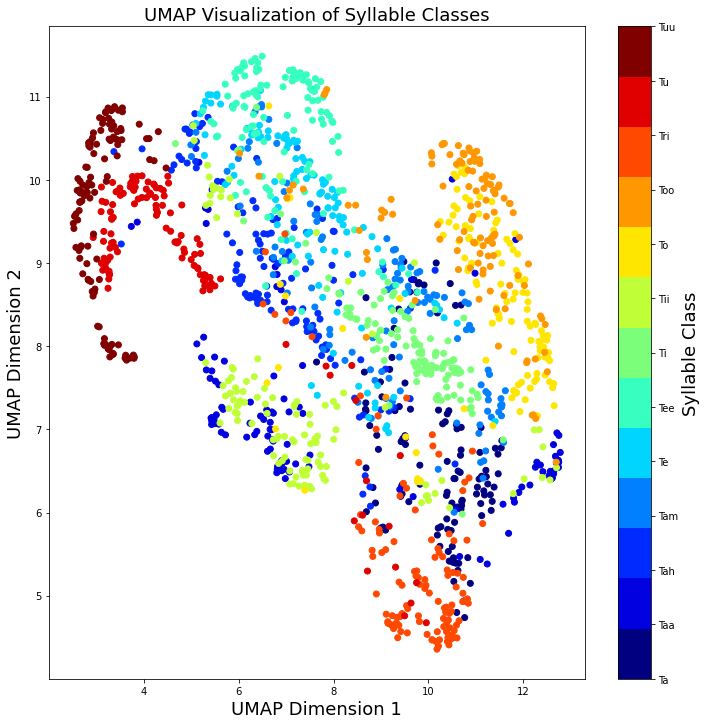

In [2]:
import os
import numpy as np
from PIL import Image, ImageOps
import umap
import matplotlib.pyplot as plt

# Set the path to the base directory containing 13 subfolders
base_data_dir = "C:\\Users\\91758\\Downloads\\padded images"

# Create a list of subdirectories within the base directory
subdirs = [os.path.join(base_data_dir, subdir) for subdir in os.listdir(base_data_dir)]

# Filter out non-directory entries
subdirs = [subdir for subdir in subdirs if os.path.isdir(subdir)]

# Set image dimensions
image_width, image_height = 256, 256

# Create empty lists to store image data and labels
image_data = []
labels = []

# Load and preprocess images from each subdirectory
for subdir in subdirs:
    subdir_name = os.path.basename(subdir)
    for image_file in os.listdir(subdir):
        image_path = os.path.join(subdir, image_file)
        image = Image.open(image_path).convert("L")
        image = ImageOps.fit(image, (image_width, image_height), method=Image.LANCZOS)
        image_array = np.array(image)
        image_data.append(image_array)
        labels.append(subdir_name)

# Convert data and labels to NumPy arrays
image_data = np.array(image_data)
labels = np.array(labels)

# Normalize pixel values
image_data = image_data.astype(np.float32) / 255.0

# Flatten images
flattened_images = image_data.reshape(image_data.shape[0], -1)

# Perform UMAP
n_components = 2
umap_model = umap.UMAP(n_components=n_components, random_state=42)  # Added random_state for reproducibility
umap_results = umap_model.fit_transform(flattened_images)

# Create a dictionary to map class labels to numeric values
unique_labels = np.unique(labels)
label_to_numeric = {label: i for i, label in enumerate(unique_labels)}

# Convert class labels to numeric values
numeric_labels = np.array([label_to_numeric[label] for label in labels])

# Visualize the results
# plt.figure(figsize=(12, 12))
# scatter = plt.scatter(umap_results[:, 0], umap_results[:, 1], c=numeric_labels, cmap=plt.cm.get_cmap("jet", len(unique_labels)))
# plt.colorbar(scatter, ticks=range(len(unique_labels)), label='Class', format=plt.FuncFormatter(lambda val, tick_num: unique_labels[int(val)]))
# plt.title("UMAP Visualization of Syllable Classes")
# plt.show()
plt.figure(figsize=(12, 12))
scatter = plt.scatter(umap_results[:, 0], umap_results[:, 1], c=numeric_labels, cmap=plt.cm.get_cmap("jet", len(unique_labels)))
colorbar = plt.colorbar(scatter, ticks=range(len(unique_labels)), label='Syllable Class', format=plt.FuncFormatter(lambda val, tick_num: unique_labels[int(val)]))
colorbar.ax.yaxis.label.set_fontsize(18)  # Set font size for colorbar label
plt.title("UMAP Visualization of Syllable Classes", fontsize=18)
plt.xlabel("UMAP Dimension 1", fontsize=18)
plt.ylabel("UMAP Dimension 2", fontsize=18)
plt.show()